# Pr√°ctica 3: Resoluci√≥n Num√©rica  de PVIs  usando Python

Autor de esta versi√≥n: **Juan Antonio Villegas**

Autor de la primera versi√≥n: Pedro Gonz√°lez Rodelas

Fecha de la primera versi√≥n: 01/05/2020

Sucesivas revisiones: 02-08 y 11/05/2020, 02/06/2021

Fecha de la √∫ltima revisi√≥n: 15/5/2025

En esta pr√°ctica se programan en lenguaje Python diferentes m√©todos num√©ricos de resoluci√≥n aproximada de Problemas de Valores Iniciales asociados a Ecuaciones Diferenciales Ordinarias (EDOs) y sistemas de primer orden, provenientes muchos de ellos de problemas y aplicaciones interesantes de F√≠sica e Ingenier√≠a.

Algunos de los ejemplos y algoritmos usados en este notebook han sido extra√≠dos, adaptados o traducidos por Pedro Gonz√°lez Rodelas de alguno de los siguientes libros y/o apuntes:


- "An√°lisis Num√©rico con Mathematica" de V. Ram√≠rez, D. Barrera, M. Pasadas y P. Gonz√°lez. Edit. Ariel Ciencia (2001) con ISBN: 84-344-8036-0. Dep. Legal: B.31.425-2001.

- Apuntes de la asignatura de M√©todos Num√©ricos II del Grado de Matem√°ticas y Dobles Grados de Matem√°ticas e Inform√°tica o F√≠sica de la UGR, de los profesores Jos√© Mart√≠nez Aroza y Victoriano Ram√≠rez Gonz√°lez.

- Notebook perteneciente al Cap√≠tulo 9 del libro [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9) de Robert Johansson.

- Cap√≠tulo 7 del libro [Numerical Methods in Engineering with Python 3](https://www.cambridge.org/core/books/numerical-methods-in-engineering-with-python-3/95151C37C2F427F30DC90FA619FE79F9) de Jaan Kiusalaas.

## 1. Carga de los m√≥dulos y funciones empleadas üî®

Antes de empezar a realizar cualquier c√°lculo num√©rico o simb√≥lico debemos de cargar los correspondientes m√≥dulos de Python que implementan la mayor√≠a de funciones y procedimientos necesarios para ello: [`numpy`](https://numpy.org/) y [`sympy`](https://www.sympy.org/), que ser√°n cargados con los pseud√≥nimos `np` y `sp`, respectivamente. Adem√°s cargaremos tambi√©n el subm√≥dulo `pyplot`, del paquete [`matplotlib`](https://matplotlib.org/), que nos permitir√° realizar las representaciones gr√°ficas que nos ayudar√°n a visualizar todo el proceso.

In [3]:
# Carga de librer√≠as necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## 2. Resolviendo EDOs simb√≥licamente con SymPy üî£

Como es bien sabido, una ecuaci√≥n diferencial ordinaria (EDO), no es m√°s que una relaci√≥n existente entre algunas derivadas de funci√≥n inc√≥gnita $y(t)$, suponiendo que resulta ser suficientemente derivable, a partir de la funci√≥n $f\equiv f(t,x)$ que determina la EDO que satisface. 

En el caso de una EDO de primer orden esta relaci√≥n se podr√≠a escribir de la siguiente manera gen√©rica: $$x'(t)=f(t,x(t)),\; t\in[a,b]$$
con $f:[a,b]\times\mathbb{R}\to \mathbb{R}$ tambi√©n suficientemente regular, o al menos continua en $(t,x)$ y Lipschitziana en $x$, para asegurar existencia y unicidad de soluci√≥n del correspondiente Problema de Valores Iniciales (PVI), para cierta condici√≥n inicial $x(t_0) = x_0 = \mu\in\mathbb{R}$ determinada de antemano:

$$\begin{array}{c l} x'(t)=f(t,x(t)),& t\in[a,b]\\ x(t_0) =x_0 = \mu  &  \end{array}$$

aunque tambi√©n suele ser habitual el empleo de la siguiente notaci√≥n

$$\begin{array}{c l} y'(t)=f(t,y(t)),& t\in[a,b]\\ y(t_0) = y_0\equiv\mu  &  \end{array}$$

o usar $x$ como variable independiente e $y$ como variable dependiente, etc. 

Como primer ejemplo, consideremos el PVI

$$
\left\{\begin{array}{rcl}
x'(t) &=& x(t) \\
x(0) &=& 1
\end{array}\right..
$$
Es decir, $f(t,x)=x$, $x(0)=x_0 = 1$. Comenzamos definiendo nuestros s√≠mbolos y nuestra funci√≥n.

In [4]:
t, x0, x = sp.symbols('t, x_0, x')
def f(t,x):
    return x

f(t,x)

x

In [5]:
a, b = 0, 1     # extremos inferior y superior del intervalo 
mu = 1          # condici√≥n inicial del PVI

Vamos a empezar definiendo la Ec. Dif. Ordinaria (edo) a resolver

In [6]:
x = sp.Function('x')
edo = x(t).diff(t)-f(t,x(t))
sp.Eq(edo,0)

Eq(-x(t) + Derivative(x(t), t), 0)

La resolvemos simb√≥licamente mediante la orden [`dsolve`](https://docs.sympy.org/latest/modules/solvers/ode.html#sympy.solvers.ode.dsolve) de SymPy.

In [7]:
edo_sol = sp.dsolve(edo)
edo_sol

Eq(x(t), C1*exp(t))

In [8]:
type(edo_sol)

sympy.core.relational.Equality

De esta soluci√≥n simb√≥lica obtenida tambi√©n podremos extraer, tanto el t√©rmino de la izquierda (mediante `.lhs`) como el de la derecha (mediante `.rhs`).

In [9]:
edo_sol.lhs  

x(t)

In [10]:
edo_sol.rhs

C1*exp(t)

A continuaci√≥n, una vez tenemos la soluci√≥n general, imponemos las condiciones iniciales. Lo hacemos a trav√©s de un diccionario.

In [11]:
ics = {x(0): x0}    # Si encuentra un x(0) lo cambia por un x_0
ics

{x(0): x_0}

Sustituimos en ambos miembros de la soluci√≥n general $t=0$, y en el miembro izquierdo, $x(0)=x_0$. As√≠, obtenemos la ecuaci√≥n asociada a la imposici√≥n de la condici√≥n inicial del PVI.

In [12]:
CI_eq = sp.Eq(edo_sol.lhs.subs({t: 0}).subs(ics), edo_sol.rhs.subs({t: 0}))
CI_eq

Eq(x_0, C1)

En este caso es muy obvia, pero en general necesitaremos resolver esta ecuaci√≥n, usamos la orden `solve`

In [13]:
CI_sol = sp.solve(CI_eq)[0]
CI_sol

{C1: x_0}

Finalmente, sustuimos la constante de la soluci√≥n general por su valor al imponer la condici√≥n inicial.

In [14]:
edo_sol_part = edo_sol.subs(CI_sol)
edo_sol_part

Eq(x(t), x_0*exp(t))

Y as√≠ obtenemos la soluci√≥n particular para cualquier $x_0$. En nuestro caso $x_0 = \mu = 1$ nuestra soluci√≥n exacta para nuestro PVI ser√≠a:

In [15]:
sol_exacta = edo_sol_part.rhs.subs({x0:mu})
sol_exacta

exp(t)

## 3. Representaci√≥n gr√°fica de las soluciones üìà

In [16]:
# Asegurar que los gr√°ficos generados con Matplotlib se muestren directamente en el notebook.
%matplotlib inline 

Para poder evaluar la soluci√≥n exacta de nuestro PVI, podemos usar `subs` y `evalf` en el caso de que queramos ver el valor num√©rico.

In [17]:
sol_exacta

exp(t)

In [18]:
sol_exacta.subs({t:1}).evalf()

2.71828182845905

Recordamos el intervalo que establecimos anteriormente.

In [19]:
a,b    # el intervalo de trabajo

(0, 1)

In [20]:
val_inf = sol_exacta.subs({t:a})  # valores de referencia a la izqda.
val_sup = sol_exacta.subs({t:b})  # y derecha del intervalo

In [21]:
# No recomendado:
# graf_sympy = sp.plot(sol_exacta, xlim =(a,b), ylim = (0,val_sup))

Siempre tendremos la posibilidad de hacerlo de la manera tradicional habitual, pero esto requerir√≠a reconvertir previamente esta soluci√≥n anal√≠tica, dada simb√≥licamente, en una funci√≥n num√©rica, evaluable de manera vectorial en arrays de valores, como por ejemplo las abcisas de la variable independiente en los que queramos obtener sus correspondientes ordenadas.

In [22]:
# Esta ser√≠a la herramienta adecuada para realizar dicha conversi√≥n
sol_exacta_np = sp.lambdify(t, sol_exacta, 'numpy')

In [23]:
t_values = np.linspace(a, b, 100) # as√≠ obtendr√≠amos el array de abcisas
x_values = sol_exacta_np(t_values) # y el de ordenadas
x_values

array([1.        , 1.0101522 , 1.02040746, 1.03076684, 1.04123139,
       1.05180218, 1.06248028, 1.07326679, 1.0841628 , 1.09516944,
       1.10628782, 1.11751907, 1.12886434, 1.1403248 , 1.1519016 ,
       1.16359593, 1.17540899, 1.18734197, 1.1993961 , 1.21157261,
       1.22387273, 1.23629773, 1.24884887, 1.26152743, 1.2743347 ,
       1.287272  , 1.30034064, 1.31354196, 1.32687729, 1.34034801,
       1.35395549, 1.36770112, 1.38158629, 1.39561243, 1.40978096,
       1.42409333, 1.43855101, 1.45315546, 1.46790818, 1.48281068,
       1.49786447, 1.51307108, 1.52843208, 1.54394902, 1.5596235 ,
       1.5754571 , 1.59145146, 1.60760818, 1.62392894, 1.64041539,
       1.65706921, 1.6738921 , 1.69088579, 1.70805199, 1.72539247,
       1.742909  , 1.76060336, 1.77847735, 1.7965328 , 1.81477156,
       1.83319548, 1.85180644, 1.87060634, 1.88959711, 1.90878067,
       1.92815899, 1.94773404, 1.96750782, 1.98748235, 2.00765966,
       2.02804182, 2.0486309 , 2.06942901, 2.09043826, 2.11166

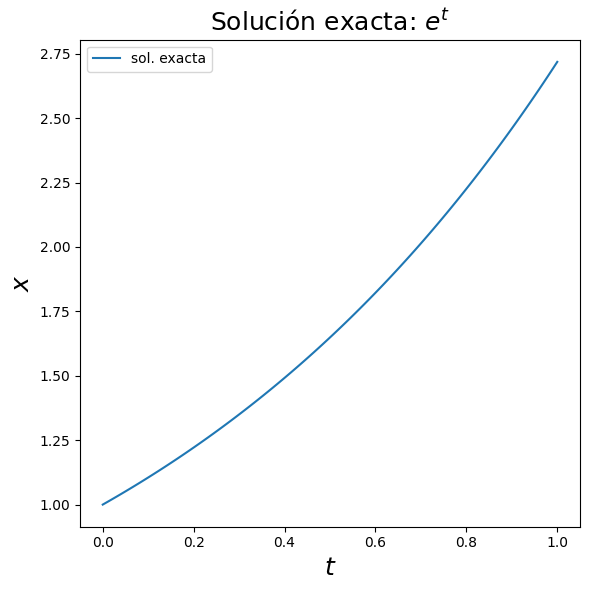

In [24]:
# Representaci√≥n gr√°fica de la soluci√≥n exacta
fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
ax.plot(t_values, x_values, label="sol. exacta")
ax.set_title(r"Soluci√≥n exacta: $%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()

fig.tight_layout()

## 4. M√©todos de Euler üåâ

El m√©todo de Euler expl√≠cito es el m√©todo m√°s sencillo de aproximaci√≥n num√©rica de soluciones de PVI. En √©l, calculamos sucesiones de valores
$$
t_{n+1} = t_n + h, \qquad x_{n+1} = x_n + h f(t_n,x_n).
$$

In [25]:
def euler_explicito(f, a, b, mu, N):
    """
    M√©todo de Euler expl√≠cito para resolver la ecuaci√≥n diferencial
    x' = f(t,x) con condici√≥n inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros((N + 1,))
    x[0] = mu
    for n in range(N):
        x[n + 1] = x[n] + h * f(t[n], x[n])
    return t, x

A continuaci√≥n aplicamos este algoritmo con un valor concreto de $N$ y la funci√≥n $f(t,x)=x$ que define nuestra EDO desde un primer momento, as√≠ como la condici√≥n inicial $x(a)=1$.

In [26]:
N = 10
t_values, x_values_Eulerexpl = euler_explicito(f,a,b,mu,N)

In [27]:
print(x_values_Eulerexpl)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.1        1.21       1.331      1.4641     1.61051
 1.771561   1.9487171  2.14358881 2.35794769 2.59374246]


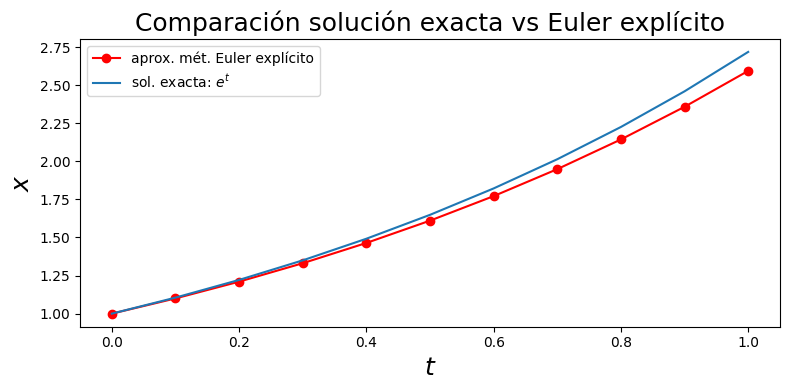

In [28]:
# Dibujamos y comparamos con la soluci√≥n exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_Eulerexpl, 'ro-',label = "aprox. m√©t. Euler expl√≠cito")
ax.plot(t_values, sol_exacta_np(t_values), label=f"sol. exacta: ${sp.latex(sol_exacta)}$")
ax.set_title(r"Comparaci√≥n soluci√≥n exacta vs Euler expl√≠cito", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

Por su parte, en el m√©todo de Euler impl√≠cito, es necesario resolver una ecuaci√≥n para obtener el nuevo valor:
$$x_{n+1} = x_n + h f(t_{n+1},x_{n+1}).$$

In [29]:
from scipy.optimize import fsolve

def euler_implicito(f, a, b, mu, N):
    """
    M√©todo de Euler expl√≠cito para resolver la ecuaci√≥n diferencial
    x' = f(t,x) con condici√≥n inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros((N + 1,))
    x[0] = mu
    # x1 = sp.symbols('x1')
    for n in range(N):
        # x[n + 1] = np.float64(sp.solve(x[n]+h*f(t[n+1],x1)-x1,x1)[0])
        x[n + 1] = fsolve(lambda x1: x[n] + h * f(t[n + 1], x1) - x1, x[n])[0]
    return t, x

In [30]:
N = 10
t_values, x_values_Eulerimpl = euler_implicito(f,a,b,mu,N)

In [31]:
print(x_values_Eulerimpl)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.11111111 1.2345679  1.37174211 1.5241579  1.69350878
 1.88167642 2.09075158 2.32305731 2.58117479 2.86797199]


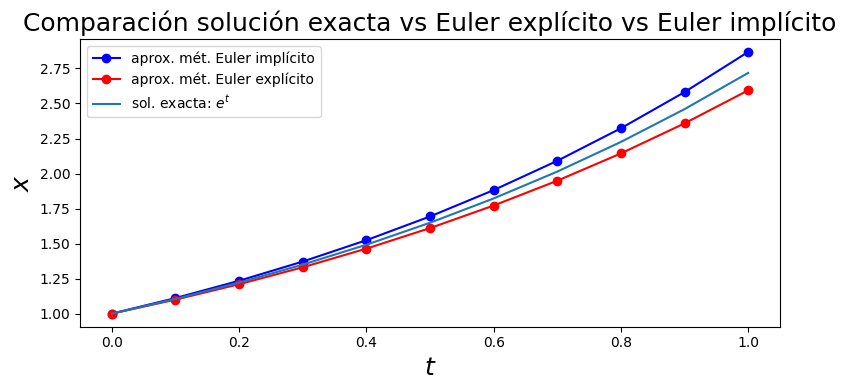

In [32]:
# Dibujamos y comparamos con la soluci√≥n exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_Eulerimpl, 'bo-',label = "aprox. m√©t. Euler impl√≠cito")
ax.plot(t_values, x_values_Eulerexpl, 'ro-',label = "aprox. m√©t. Euler expl√≠cito")
ax.plot(t_values, sol_exacta_np(t_values), label=f"sol. exacta: ${sp.latex(sol_exacta)}$")
ax.set_title(r"Comparaci√≥n soluci√≥n exacta vs Euler expl√≠cito vs Euler impl√≠cito", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

> **Ejercicio 1:** Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisi√≥n, estabilidad y coste computacional.

> **Ejercicio 2:** A partir de la implementaci√≥n del algoritmo del m√©todo de Euler expl√≠cito, realice las modificaciones oportunas para obtener tambi√©n las implementaciones correspondientes a los m√©todos de Euler mejorado (o del punto medio), as√≠ como del de Euler modificado (o de Heun).

In [33]:
# 1. SImplemente repetir con m√°s nodos.
# Lo del coste es metiante la biblioteca timeit

Habr√≠a una posibilidad de intentar estimar el tiempo de CPU empleado 

In [34]:
import timeit

In [35]:
N = 10
%time
_, _ = euler_explicito(f,a,b,mu,N)

CPU times: user 8 Œºs, sys: 1 Œºs, total: 9 Œºs
Wall time: 16.2 Œºs


In [36]:
%%timeit
_, _ = euler_explicito(f,a,b,mu,N)

26.8 Œºs ¬± 1.46 Œºs per loop (mean ¬± std. dev. of 7 runs, 10,000 loops each)


In [37]:
%time
_, _ = euler_implicito(f,a,b,mu,N)

CPU times: user 5 Œºs, sys: 0 ns, total: 5 Œºs
Wall time: 9.54 Œºs


In [38]:
%%timeit
_, _ = euler_implicito(f,a,b,mu,N)

642 Œºs ¬± 29.9 Œºs per loop (mean ¬± std. dev. of 7 runs, 1,000 loops each)


Al usar `%time` el int√©rprete de Python nos intenta devolver el tiempo empleado en la ejecuci√≥n de dicho comando (o linea de comandos), pero esto suele depender muchas veces de la carga puntual de la CPU en ese justo momento de la ejecuci√≥n; por ese motivo se suele preferir el uso del comando m√°gico `%%timeit` que lo que hace m√°s bien es realizar una tanda de ejecuciones repetitivas de dicha linea o bloque de comandos, tantas veces como sea necesario para obtener un valor estimado promedio, que es el que nos devuelve seguidamente. Habr√° que tener en cuenta en todo caso, tanto las unidades de medida del tiempo que nos devuelva (ya sea en  nano- ($10^{-9}$ s), micro- ($10^{-6}$ s), mili-segundos ($10^{-3}$ s), etc), como el n√∫mero de veces que se ha llevado a cabo la tanda de repeticiones, que puede oscilar entre unos cientos o miles, hasta a veces un mill√≥n, para poder comparar finalmente de una manera realista la rapidez de ejecuci√≥n de cierto trozo de c√≥digo.

## 5. M√©todos de Taylor ü™©

Como es bien sabido, los m√©todos de Taylor se basan en un adecuado desarrollo en serie de Taylor de la propia funci√≥n inc√≥gnita $x(t)$, suponiendo que resulta ser suficientemente derivable, y que sus derivadas sucesivas se pueden obtener a partir de la funci√≥n $f$ que determina la EDO que satisface: $$x'(t)=f(t,x(t)),\; t\in[a,b]$$

As√≠ pues, si suponemos que $x\in\mathcal{C}^p$ y que podemos realizar un desarrollo en serie como el que sigue:
$$x(t+h)\approx x(t)+h\, x'(t)+\frac{h^2}{2}\, x''(t)+\ldots+\frac{h^p}{p!}\, x^{(p)}(t)\\ \equiv x(t)+h\, F_1(t,x(t))+\frac{h^2}{2}\, F_2(t,x(t))+\ldots+\frac{h^p}{p!}\, F_p(t,x(t))$$

pues justamente el conocido m√©todo de Euler expl√≠cito, visto anteriormente, corresponder√≠a con el desarrollo de Taylor correspondiente al caso $p=1$, definiendo por ejemplo $F_1(t,x)\equiv f(t,x)$. 

As√≠ pues vamos por ejemplo a centrarnos en desarrollar por ejemplo, el siguiente caso $p=2$, y los dem√°s casos $p>2$ se har√≠an de la misma manera, s√≥lo que conllevar√≠an la realizaci√≥n de m√°s c√°lculos del mismo tipo.

**Caso $p=2$:**
Aqu√≠ de lo que se tratar√≠a es de aprovechar la expresi√≥n de la EDO que relaciona la derivada primera de $x(t)$ con $f(t,x(t))$, y realizar la derivada segunda de acuerdo con el siguiente desarrollo (asumiendo que $f\equiv f(t,x)$):

$$x''(t)=\frac{d}{dt}x'(t)=\frac{d}{dt}(f(t,x(t)))=\frac{df}{dt}(t,x(t))+\frac{df}{dx}(t,x(t))\,x'(t) \\= \frac{df}{dt}(t,x(t))+\frac{df}{dx}(t,x(t))\,f(t,x(t)) \equiv F_2(t,x(t))$$

de manera que finalmente nuestro m√©todos de Taylor de orden $p=2$ quedar√≠a como sigue:

$$x(t+h)\approx x(t)+h\,F_1(t,x(t)) +\frac{h^2}{2}\, F_2(t,x(t))$$

con $F_1(t,x)\equiv f(t,x)$  y $F_2(t,x)\equiv \frac{df}{dt}(t,x)+\frac{df}{dx}(t,x)\,f(t,x)$.

Vamos pues a intentar implementar este m√©todo de Taylor de orden $p=2$ aprovechando las capacidadesd de c√°lculo simb√≥lico que tambi√©n nos proporciona el m√≥dulo de c√°lculo simb√≥lico de Python, `SymPy`.

Recordemos que `x` la definimos anteriormente como funci√≥n, lo cual puede provocar error a la hora de derivar `f` respecto de `x`.

In [39]:
type(x)

sympy.core.function.UndefinedFunction

In [ ]:
#sp.diff(f(t,x), x) # Error

Utilizaremos en su lugar una nueva variable, `z`.

In [ ]:
z = sp.Symbol('z')
f(t,z)

z

In [ ]:
f(t,z), sp.diff(f(t,z),t), sp.diff(f(t,z),z)

(z, 0, 1)

In [ ]:
def F1(t,z):
    return f(t,z)

def F2(t,z):
    return sp.diff(f(t,z),t) + sp.diff(f(t,z),z)*f(t,z)

In [ ]:
F1(t,z), F2(t,z)

(z, z)

In [ ]:
def taylor_2(f, a, b, mu, N):
    """
    M√©todo de Taylor de orden 2 para resolver la ecuaci√≥n diferencial
    x' = f(t,x) con condici√≥n inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t_values = np.linspace(a, b, N + 1)
    x_values = np.zeros(N + 1)
    x_values[0] = mu
    t, z = sp.symbols('t z')
    F1 = lambda t,z: f(t,z)
    F2 = lambda t,z: sp.diff(f(t,z),t) + sp.diff(f(t,z),z)*f(t,z)
    for n in range(N):
        x_values[n + 1] = np.float64(x_values[n] + h * F1(t_values[n], x_values[n]) + \
                                     (h**2 / 2) * F2(t,z).subs({t: t_values[n], z: x_values[n]}))
    return t_values, x_values

In [ ]:
N = 10
t_values, x_values_Taylor2 = taylor_2(f,a,b,mu,N)

In [ ]:
print(x_values_Taylor2)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


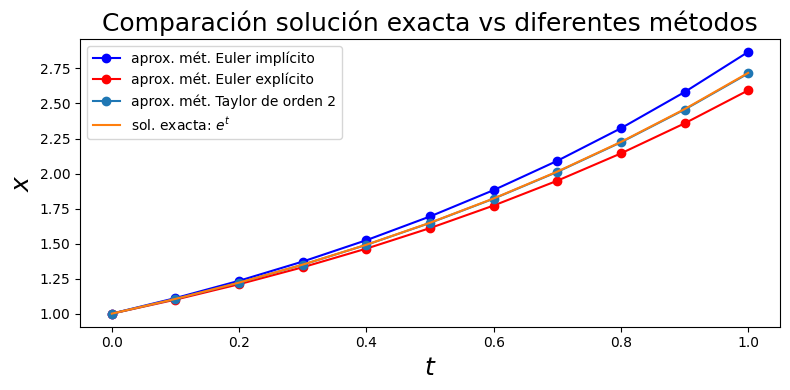

In [ ]:
# Dibujamos y comparamos con la soluci√≥n exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_Eulerimpl, 'bo-',label = "aprox. m√©t. Euler impl√≠cito")
ax.plot(t_values, x_values_Eulerexpl, 'ro-',label = "aprox. m√©t. Euler expl√≠cito")
ax.plot(t_values, x_values_Taylor2, 'o-',label = "aprox. m√©t. Taylor de orden 2")
ax.plot(t_values, sol_exacta_np(t_values), label=f"sol. exacta: ${sp.latex(sol_exacta)}$")
ax.set_title(r"Comparaci√≥n soluci√≥n exacta vs diferentes m√©todos", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

Vemos que en este caso la aproximaci√≥n por el m√©todo de Taylor de orden 2 es muy cercana a la soluci√≥n exacta. Para hacernos una idea del error que estamos cometiendo, calcularemos el error cuadr√°tico medio, esto es:
$$
ECM = \dfrac 1 {N+1} \sum_{n=0}^{N} (x(t_n) - x_n)^2, 
$$
donde $x(t)$ es la soluci√≥n exacta y $x_n$ la sucesi√≥n de aproximaciones que calculamos con este m√©todo.

In [ ]:
ECM_taylor2 = ((x_values_Taylor2 - sol_exacta_np(t_values))**2).mean()
ECM_taylor2

np.float64(4.32470120081979e-06)

Otra forma de aproximar el error es calcular el m√°ximo error absoluto, es decir:
$$
MEA = \max_{n=0,\dots,N}|x(t_n)-x_n|,
$$
aunque es una medida poco representativa, pues una desviaci√≥n en un √∫nico punto puede dar indicios de ser una mala aproximaci√≥n cuando realmente puede no serlo.

In [ ]:
MEA_taylor2 = np.max(np.abs(x_values_Taylor2 - sol_exacta_np(t_values)))
MEA_taylor2

np.float64(0.004200981850820629)

> **Ejercicio 3** A partir de la implementaci√≥n del algoritmo del m√©todo de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener tambi√©n una posible implementaci√≥n correspondiente al m√©todo de Taylor de orden $p=3$.

## 6. M√©todos de Runge-Kutta ‚ûø

Debido a la complejidad del desarrollo de las derivadas a partir de cierto orden, los m√©todos de Taylor no son muy utilizados. En su lugar, los m√©todos de Runge-Kutta (RK), son bastante populares.

En particular, vamos a ver el m√©todo de RK de 2 evaluaciones en esta pr√°ctica, que como sabemos admite dos par√°metros $\alpha$ y $\beta$, cumpliendo $\alpha\beta=1/2$, de forma que
$$
x_{n+1} = x_n + h ((1-\alpha)K_1+\alpha K_2),
$$
donde $K_1 = f(t_n, x_n), K_2=f(t_n+\beta h, h\beta K_1)$.

In [ ]:
def RK2(f, a, b, mu, N, alpha=0.5, beta=1):
    """
    M√©todo de Runge-Kutta de orden 2 para resolver la ecuaci√≥n diferencial
    x' = f(t,x) con condici√≥n inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t_values = np.linspace(a, b, N + 1)
    x_values = np.zeros(N + 1)
    x_values[0] = mu
    for n in range(N):
        K1 = f(t_values[n], x_values[n])
        K2 = f(t_values[n] + beta * h, x_values[n] + beta * h * K1)
        x_values[n + 1] = x_values[n] + h * ((1-alpha)*K1 + alpha*K2)
    return t_values, x_values

In [ ]:
N = 10
alpha, beta = 1, 1/2 # Euler mejorado o punto medio
t_values, x_values_rk2_pm = RK2(f,a,b,mu,N,alpha=alpha, beta=beta)

In [ ]:
print(x_values_rk2_pm)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


In [ ]:
N = 10
alpha, beta = 1/2, 1 # Euler modificado o Heun
t_values, x_values_rk2_H = RK2(f,a,b,mu,N,alpha=alpha, beta=beta)

In [ ]:
print(x_values_rk2_H)  #  Aproximaciones obtenidas en los nodos considerados

[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


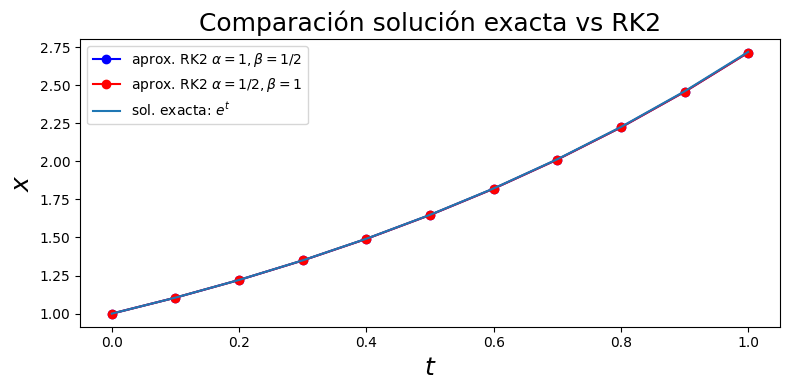

In [ ]:
# Dibujamos y comparamos con la soluci√≥n exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_rk2_pm, 'bo-',label = r"aprox. RK2 $\alpha=1,\beta=1/2$")
ax.plot(t_values, x_values_rk2_H, 'ro-',label = r"aprox. RK2 $\alpha=1/2,\beta=1$")
ax.plot(t_values, sol_exacta_np(t_values), label=f"sol. exacta: ${sp.latex(sol_exacta)}$")
ax.set_title(r"Comparaci√≥n soluci√≥n exacta vs RK2", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

In [ ]:
ECM_rk2_pm = ((x_values_rk2_pm - sol_exacta_np(t_values))**2).mean()
ECM_rk2_H  = ((x_values_rk2_H  - sol_exacta_np(t_values))**2).mean()
ECM_rk2_pm, ECM_rk2_H

(np.float64(4.324701200821029e-06), np.float64(4.324701200821029e-06))

In [ ]:
MEA_rk2_pm = np.max(np.abs(x_values_rk2_pm - sol_exacta_np(t_values)))
MEA_rk2_H  = np.max(np.abs(x_values_rk2_H  - sol_exacta_np(t_values)))
MEA_rk2_pm, MEA_rk2_H

(np.float64(0.004200981850821073), np.float64(0.004200981850821073))

Por su parte, en el m√©todo de Runge-Kutta de 4 evaluaciones, tambi√©n conocido como m√©todo de Runge-Kuta cl√°sico, la sucesi√≥n se calcula mediante
$$
x_{n+1} = x_n + \frac h 6 (K_1+2K_2+2K_3+K_4),
$$
donde $K_1=f(t_n,x_n)$, $K_2 = f(t_n+\frac h 2, x_n + \frac h 2 K_1)$, $K_3 = f(t_n+\frac h 2, x_n + \frac h 2 K_2)$ y $K_4 = f(t_n+h, x_n + h K_3)$.

> **Ejercicio 4:** Programe el m√©todo de Runge-Kutta de 4 evaluaciones y grafique la sucesi√≥n de aproximaciones y calcule el error cuadr√°tico medio y el m√°ximo error absoluto con respecto a la soluci√≥n exacta.

> **Ejercicio 5 (Ejercicio final de las diapositivas):** Se pretende aproximar la soluci√≥n del PVI:
> $$
> \left\{\begin{array}{rcl}
> x'(t) &=& \dfrac{t-x(t)} 2 \\
> x(0) &=& 1
> \end{array}\right..
> $$
> en $[0,3]$
> 1. Usa el m√©todo de Runge-Kutta de 2 evaluaciones con $\alpha= 3/4$ y $\beta=2/3$ para $h = 1$, $h = 1/2$, $h = 1/4$ y $h = 1/8$ y compara los resultados obtenidos.
> 2. Repite el apartado anterior usando Runge-Kutta cl√°sico.
> 
> Nota: La soluci√≥n exacta es $x(t) = 3 e^{-t/2} + t -2$.